# We undestand the significant charateristics of the data in the dataset with this simple exploratory data analysis from that derieve insights for feature engineering.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_eda_full = pd.read_csv('./data/entire_data.csv')

In [3]:
df_drift_test = pd.read_csv('./data/evidently_current_data.csv')

In [4]:
df_eda_full.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,14


In [5]:
df_eda_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   count       17379 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 1.3+ MB


## Since we have considering monitoring in the MLOPS pipeline with the data in `df_drift_test` as the `current dataset`, this would be future data that would be coming as newly labelled data with ground truth arriving monthly. Hence we need to drop this data from `df_eda_full` before proceeding with any operations.

#### N.B.: In real life, the newly coming future would actually have the `casual` and `registered` columns which we shall anyways drop (reason mentioned at `data-extraction-and-preparation.ipynb`) when processing the data for the current dataset for monitoring with Evidently.

In [6]:
# Converting 'datetime' column to datetime dtype from object dtype
df_eda_full['datetime'] = pd.to_datetime(df_eda_full['datetime'])
df_drift_test['datetime'] = pd.to_datetime(df_drift_test['datetime'])

In [7]:
# removing the future data
df_eda_full = df_eda_full[~df_eda_full['datetime'].isin(df_drift_test['datetime'])]

In [8]:
# sanity-check
df_eda_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14491 entries, 0 to 14490
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    14491 non-null  datetime64[ns]
 1   season      14491 non-null  int64         
 2   holiday     14491 non-null  int64         
 3   workingday  14491 non-null  int64         
 4   weather     14491 non-null  int64         
 5   temp        14491 non-null  float64       
 6   atemp       14491 non-null  float64       
 7   humidity    14491 non-null  int64         
 8   windspeed   14491 non-null  float64       
 9   count       14491 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 1.2 MB


In [9]:
# checking the stats of the dataset
df_eda_full.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,14491,14491.000000,14491.000000,14491.000000,14491.000000,14491.000000,14491.000000,14491.00000,14491.000000,14491.000000
mean,2011-11-03 04:57:22.743772160,2.293700,0.026292,0.687323,1.418191,20.800872,24.210333,62.39176,12.874087,179.344973
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.00000,0.000000,1.000000
25%,2011-06-04 20:30:00,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.00000,7.001500,38.000000
50%,2011-11-03 12:00:00,2.000000,0.000000,1.000000,1.000000,21.320000,25.000000,62.00000,12.998000,135.000000
75%,2012-04-02 23:30:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,79.00000,19.001200,267.000000
max,2012-08-31 23:00:00,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.00000,56.996900,957.000000
std,NaN,1.025352,0.160008,0.463600,0.642081,8.125688,8.834477,19.70527,8.218340,171.462654


We can infer: Accounting for various weather conditions, across all seasons, ranging from arid to highly humid (RH --> 100) and temperature dropping to snow cold (0 degree C) and soaring to 41 degree C, and windspeed blowing upto 57 speed units:

*   The maximum numbers of bike rented in an hour can be as big as 957
*   The average hourly rental count is 179
*   The minimum number of hourly bike rental count can be as low as 1

In [10]:
# let us check if any null value exists in this dataset
df_eda_full.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
count,0


#### No null values

In [11]:
# checking if duplicate rows exist in the dataset
df_eda_full.duplicated().sum()

np.int64(0)

#### No duplicate values

In [12]:
# checking if there are any negative values in any of the attributes
# Exclude the 'datetime' column from the check for negative values
df_eda_full.select_dtypes(exclude=['datetime']).lt(0).sum()

,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
count,0


#### No negative values (not even some for temperature, which would have made more sense!)

In [13]:
# checking unique values in the whole dataset
df_eda_full.nunique()

,0
datetime,14491
season,4
holiday,2
workingday,2
weather,4
temp,50
atemp,65
humidity,89
windspeed,30
count,813


## Analysis of the target variable

#### Visualize the outliers in the target feature

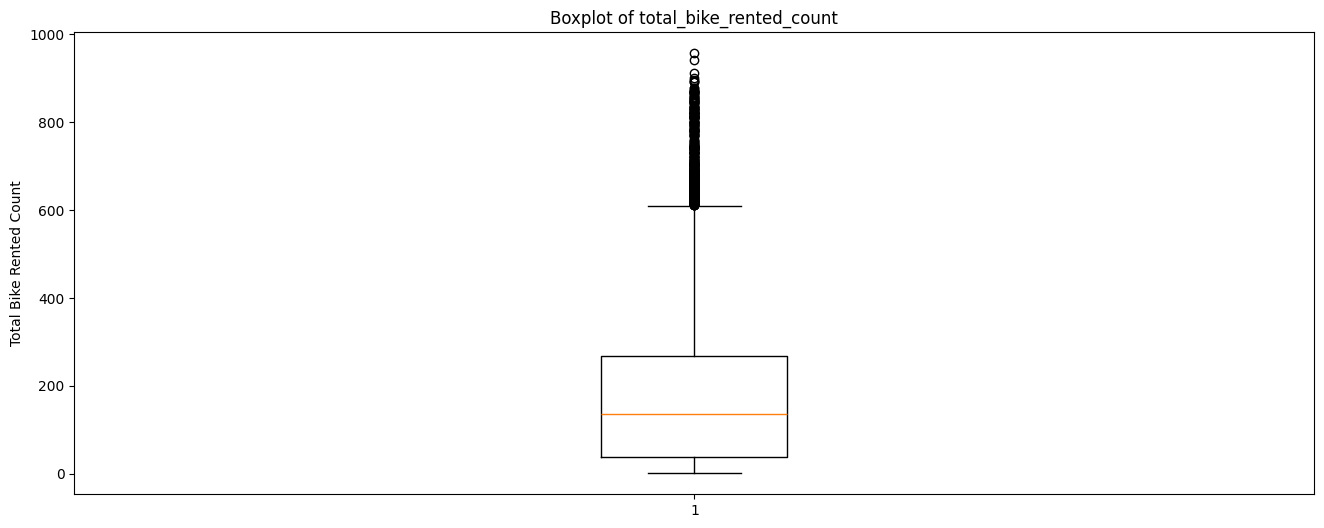

In [14]:
# Visualize the outliers in the target feature
plt.figure(figsize=(16, 6))
plt.boxplot(df_eda_full['count'], vert=True)
plt.title('Boxplot of total_bike_rented_count')
plt.ylabel('Total Bike Rented Count')
plt.show()

####  We observe outliers in the target feature

In [15]:
# Analyzing the Inter Quartile Range for the target feature
q1 = df_eda_full['count'].quantile(0.25)
q3 = df_eda_full['count'].quantile(0.75)
iqr = q3 - q1

print(q1, q3)
# Define IQR bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify inliers and outliers
inlier_mask = (df_eda_full['count'] >= lower_bound) & (df_eda_full['count'] <= upper_bound)
outlier_mask = ~inlier_mask

# Count them
num_inliers = inlier_mask.sum()
num_outliers = outlier_mask.sum()
total = len(df_eda_full)

print(f"Total Records           : {total}")
print(f"Number of Records in the  Inter Quartile Range : {num_inliers} ({num_inliers/total:.3%})")
print(f"Number of Outliers      : {num_outliers} ({num_outliers/total:.3%})")

38.0 267.0
Total Records           : 14491
Number of Records in the  Inter Quartile Range : 14097 (97.281%)
Number of Outliers      : 394 (2.719%)


#### Now let us do a distribution plot of the target variable

/tmp/ipython-input-139578407.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12);


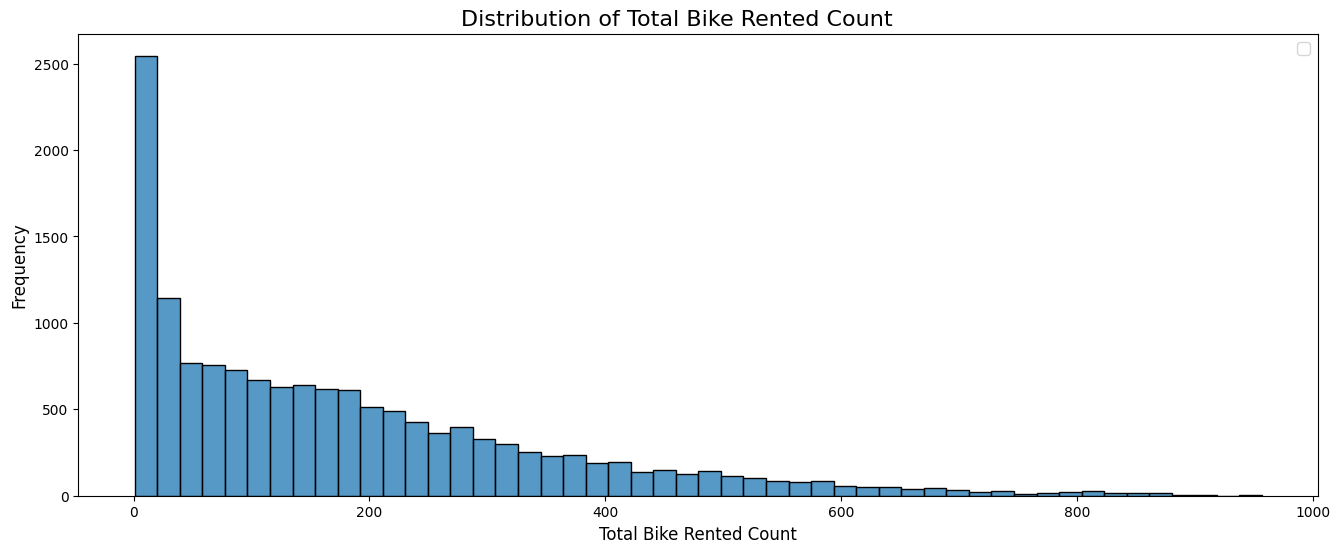

In [16]:
plt.figure(figsize=(16, 6))
sns.histplot(df_eda_full['count'], bins=50)
plt.title("Distribution of Total Bike Rented Count      ", fontsize=16)
plt.xlabel("Total Bike Rented Count", fontsize=12)
#plt.xticks(np.arange(0, 1001, 100))
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12);

##### We can see the target feature has a Long Tail Distribution. Hence, let us apply logarithmic transformation to the target feature

/tmp/ipython-input-2261687897.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12);


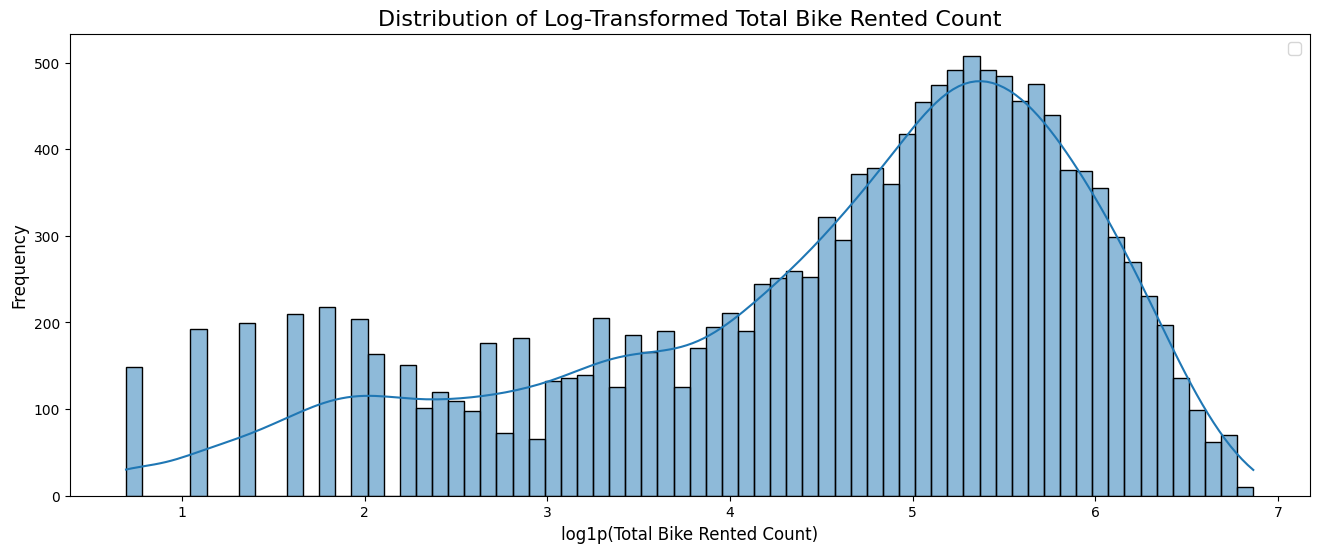

In [17]:
plt.figure(figsize=(16, 6))
# Plot histogram with KDE
sns.histplot(np.log1p(df_eda_full['count'])	, bins=70, kde=True)
plt.title("Distribution of Log-Transformed Total Bike Rented Count", fontsize=16)
plt.xlabel("log1p(Total Bike Rented Count)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12);

#### Now it seems far closer to a Normal Distribution than before

## Feature Engineering, Data Fixing and Feature Imputation

##### Let us proceed to break the datetime column into meaningful temporal features which might help increase model training efficiency.

In [18]:
# Extract hour
df_eda_full['hour'] = df_eda_full['datetime'].dt.hour

# Extract day name of week
df_eda_full['day_name'] = df_eda_full['datetime'].dt.day_name()

# Extract month name
df_eda_full['month'] = df_eda_full['datetime'].dt.month_name()

# Extract year
df_eda_full['year'] = df_eda_full['datetime'].dt.year

In [19]:
# sanity-check
df_eda_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14491 entries, 0 to 14490
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    14491 non-null  datetime64[ns]
 1   season      14491 non-null  int64         
 2   holiday     14491 non-null  int64         
 3   workingday  14491 non-null  int64         
 4   weather     14491 non-null  int64         
 5   temp        14491 non-null  float64       
 6   atemp       14491 non-null  float64       
 7   humidity    14491 non-null  int64         
 8   windspeed   14491 non-null  float64       
 9   count       14491 non-null  int64         
 10  hour        14491 non-null  int32         
 11  day_name    14491 non-null  object        
 12  month       14491 non-null  object        
 13  year        14491 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(6), object(2)
memory usage: 1.5+ MB


#### Let us do some data analysis with these newly engineered features

/tmp/ipython-input-581005994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda_full, x="hour", y="count", estimator='mean', errorbar=None, palette='viridis')
/tmp/ipython-input-581005994.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


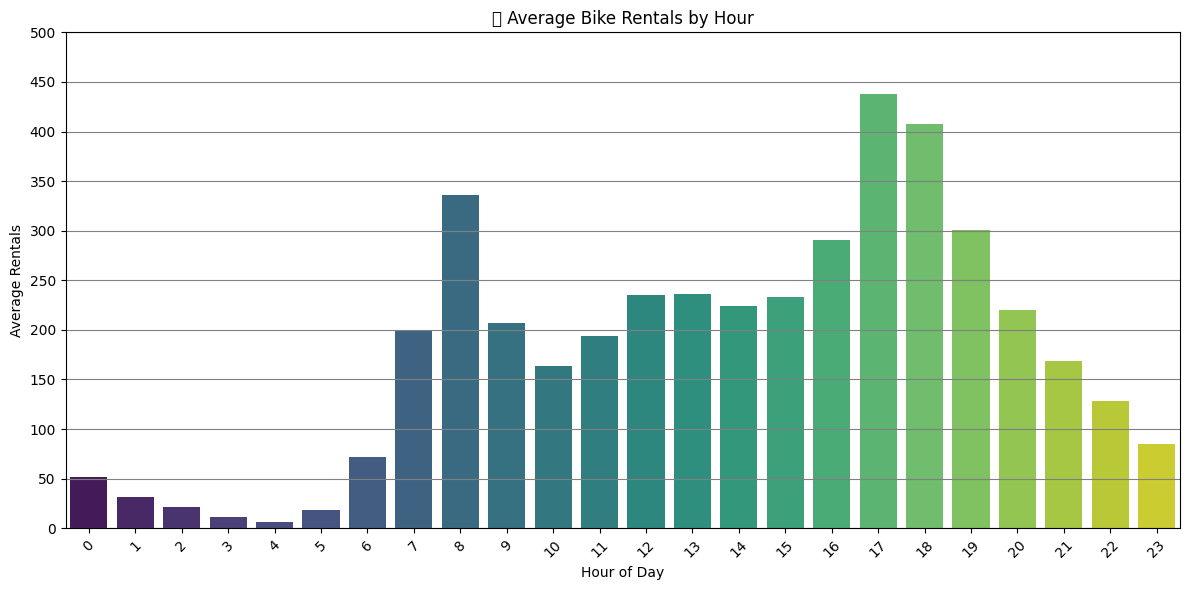

In [20]:
# Plot for  Average Bike Rentals by Hour of the Day
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=df_eda_full, x="hour", y="count", estimator='mean', errorbar=None, palette='viridis')
plt.title("📈 Average Bike Rentals by Hour")
plt.ylabel("Average Rentals")
plt.xlabel("Hour of Day")
plt.yticks(range(0, 500 + 50, 50))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color='gray', axis='y')
plt.show()

/tmp/ipython-input-4236232230.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda_full, x="day_name", y="count", order=day_order, estimator='mean', errorbar=None, palette='terrain')
/tmp/ipython-input-4236232230.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


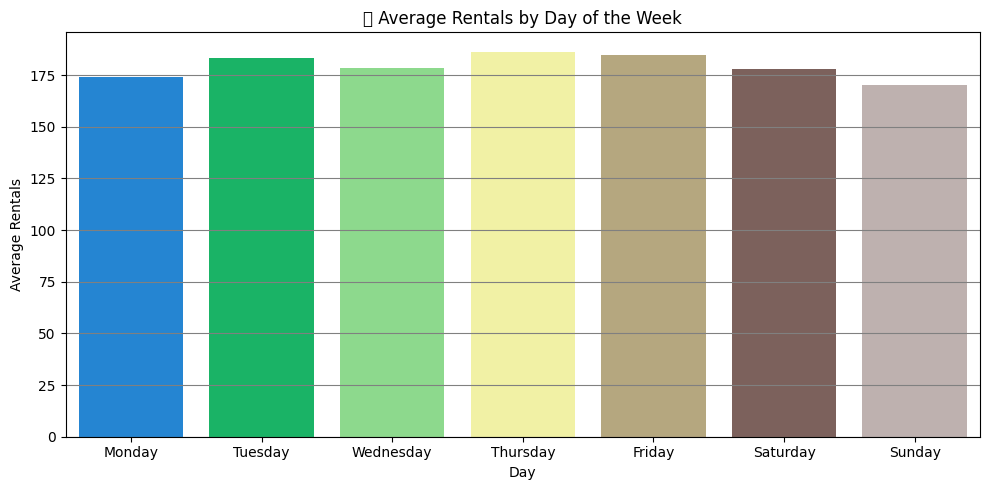

In [21]:
 # Average Rentals by Day of the Week

 # sort day name
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.barplot(data=df_eda_full, x="day_name", y="count", order=day_order, estimator='mean', errorbar=None, palette='terrain')
plt.title("📊 Average Rentals by Day of the Week")
plt.ylabel("Average Rentals")
plt.xlabel("Day")
plt.tight_layout()
plt.grid(color='gray', axis='y')
plt.show()

/tmp/ipython-input-595433625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda_full, x="month", y="count", estimator='mean', errorbar=None, palette='Set2')
/tmp/ipython-input-595433625.py:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


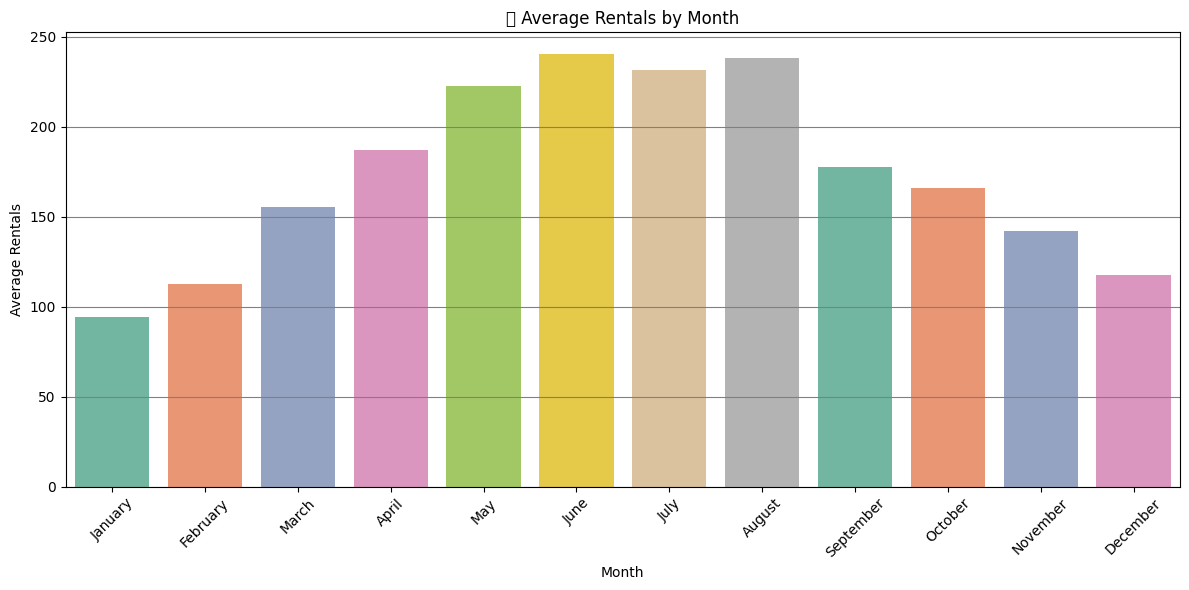

In [22]:
# Average Rentals by Month

plt.figure(figsize=(12,6))
sns.barplot(data=df_eda_full, x="month", y="count", estimator='mean', errorbar=None, palette='Set2')
plt.title("📆 Average Rentals by Month")
plt.ylabel("Average Rentals")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color='gray', axis='y')
plt.show()

/tmp/ipython-input-2904049128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda_full, x="year", y="count", estimator='mean', errorbar=None, palette='bright')
/tmp/ipython-input-2904049128.py:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


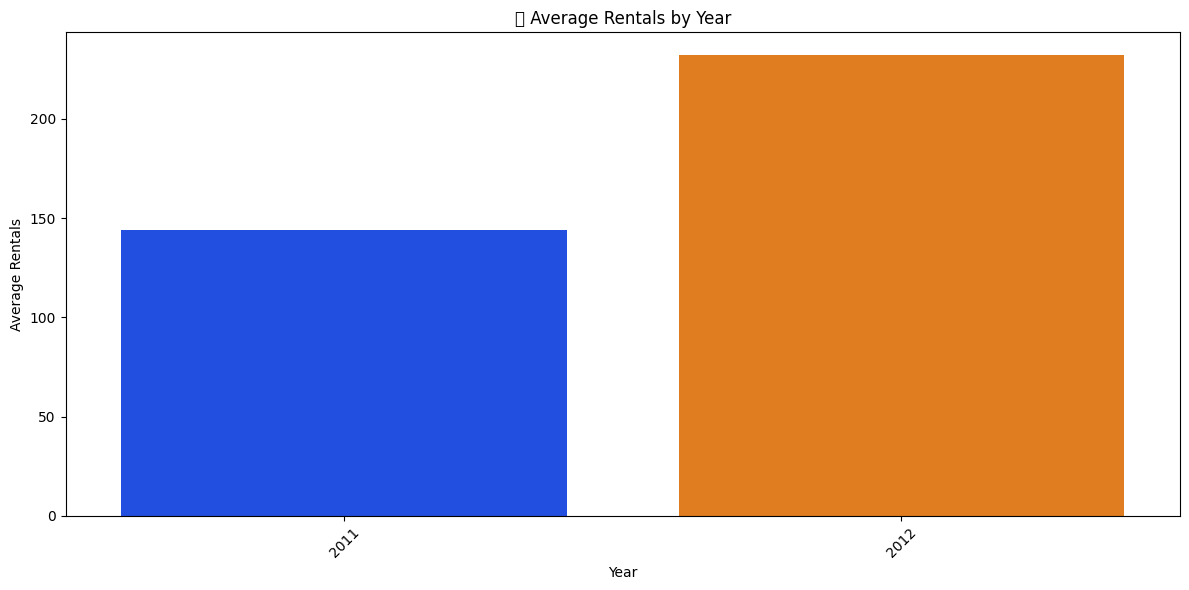

In [23]:
# Average Rentals by Year

plt.figure(figsize=(12,6))
sns.barplot(data=df_eda_full, x="year", y="count", estimator='mean', errorbar=None, palette='bright')
plt.title("📆 Average Rentals by Year")
plt.ylabel("Average Rentals")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Significant inference we can draw from this analysis



*   We see spike in average hourly rental counts from 7AM to 9AM and again from 4 PM to 7 PM probably owing to regular office, school and college goers.
*   No significant changes observed on day-of-week wise bike rental counts

*   We observe surge in average bike rental during the summer months: June, July August
*   The bike rental mean has increased much in the following year 2022 probably due to good propoganda and service satisfaction.





##### We notice that the features `season` and `weather` have values 1 to 4 indicating categorically different seasons & weather conditions respectively. We shall map these numeric values to their orignal names given in the official data label for clarity in EDA.

In [24]:
# processing for the season column-->>Going by the official data labels------>> season - 1 = spring | 2 = summer | 3 = fall | 4 = winter
df_eda_full["season"] = df_eda_full["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

In [25]:
# processing for the weather column
df_eda_full["weather"] = df_eda_full["weather"].map({
    1: "Clear/Partly Cloudy",     # for: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: "Mist/Cloudy",             # for: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: "Light Snow/Rain",         # for: Light Snow, Light Rain + Thunderstorm + Scattered clouds, etc.
    4: "Heavy Precipitation"      # for: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
})

#### Let us have a look if the seasons for Washington DC have properly been mapped to the months

In [26]:
for month in df_eda_full['month'].unique():
    unique_seasons = df_eda_full[df_eda_full['month'] == month]['season'].unique()
    print(f"{month}: {unique_seasons}")

January: ['Spring']
February: ['Spring']
March: ['Spring' 'Summer']
April: ['Summer']
May: ['Summer']
June: ['Summer' 'Fall']
July: ['Fall']
August: ['Fall']
September: ['Fall' 'Winter']
October: ['Winter']
November: ['Winter']
December: ['Winter' 'Spring']


#### There seems to be major anomaly with the data of this feature, probably during data collection or may be somewhere downstream. Anyways, we need to fix this and we have Washington DC official season-month mapping as :` Spring (March-May), Summer (June-August), Fall (September-November), and Winter (December-February).`

In [27]:
def map_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

In [28]:
# Apply fix
df_eda_full['season'] = df_eda_full['month'].apply(map_season)

In [29]:
# sanity-check
for month in df_eda_full['month'].unique():
    unique_seasons = df_eda_full[df_eda_full['month'] == month]['season'].unique()
    print(f"{month}: {unique_seasons}")

January: ['Winter']
February: ['Winter']
March: ['Spring']
April: ['Spring']
May: ['Spring']
June: ['Summer']
July: ['Summer']
August: ['Summer']
September: ['Fall']
October: ['Fall']
November: ['Fall']
December: ['Winter']


In [30]:
# more sanity-check
df_eda_full.iloc[5664:5672]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day_name,month,year
5664,2011-08-29 11:00:00,Summer,0,1,Clear/Partly Cloudy,27.06,31.060,47,11.0014,138,11,Monday,August,2011
5665,2011-08-29 12:00:00,Summer,0,1,Mist/Cloudy,27.88,31.820,44,11.0014,207,12,Monday,August,2011
5666,2011-08-29 13:00:00,Summer,0,1,Mist/Cloudy,28.70,31.820,39,0.0000,218,13,Monday,August,2011
5667,2011-08-29 14:00:00,Summer,0,1,Clear/Partly Cloudy,28.70,31.820,42,0.0000,182,14,Monday,August,2011
5668,2011-08-29 15:00:00,Summer,0,1,Clear/Partly Cloudy,28.70,31.820,42,11.0014,220,15,Monday,August,2011
5669,2011-08-29 16:00:00,Summer,0,1,Clear/Partly Cloudy,29.52,32.575,42,11.0014,282,16,Monday,August,2011
5670,2011-08-29 17:00:00,Summer,0,1,Mist/Cloudy,28.70,31.820,47,15.0013,591,17,Monday,August,2011
5671,2011-08-29 18:00:00,Summer,0,1,Clear/Partly Cloudy,27.06,31.060,47,16.9979,547,18,Monday,August,2011


#### Let us now visualize the bilke rental count distributions w.r.t these 2 modified features

/tmp/ipython-input-1788595206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='count', data=df_eda_full, palette='Set2')
/tmp/ipython-input-1788595206.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='count', data=df_eda_full, palette='Set3')


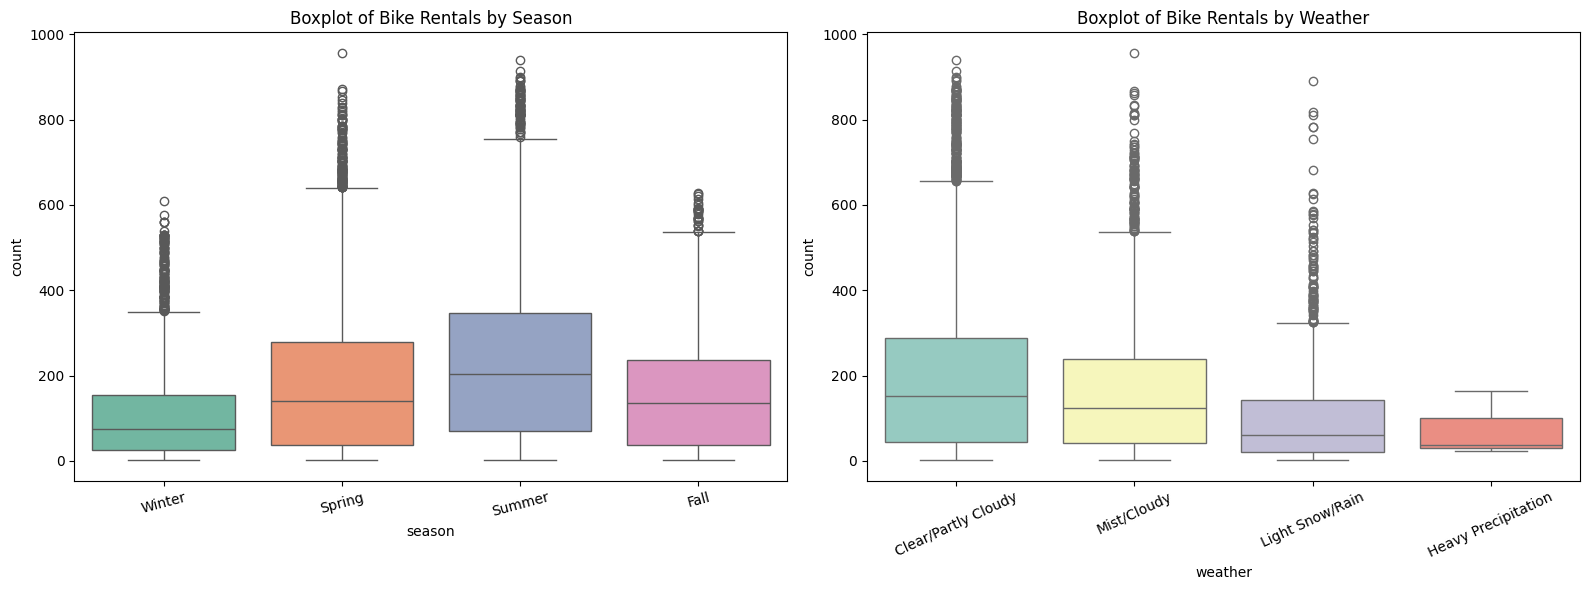

In [31]:
plt.figure(figsize=(16, 6))

# Boxplot for Season
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='count', data=df_eda_full, palette='Set2')
plt.title('Boxplot of Bike Rentals by Season')
plt.xticks(rotation=15)

# Boxplot for Weather
plt.subplot(1, 2, 2)
sns.boxplot(x='weather', y='count', data=df_eda_full, palette='Set3')
plt.title('Boxplot of Bike Rentals by Weather')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

#### We see that


*  Summer has the highest median rentals (the central line inside the box), a little higher than Spring
*   As expected, Clear/Partly Cloudy days show the highest rentals, with a high median and wide IQR.



#### Let us also check the how temperature, feels-like-temperature and humidity affects the rental countt

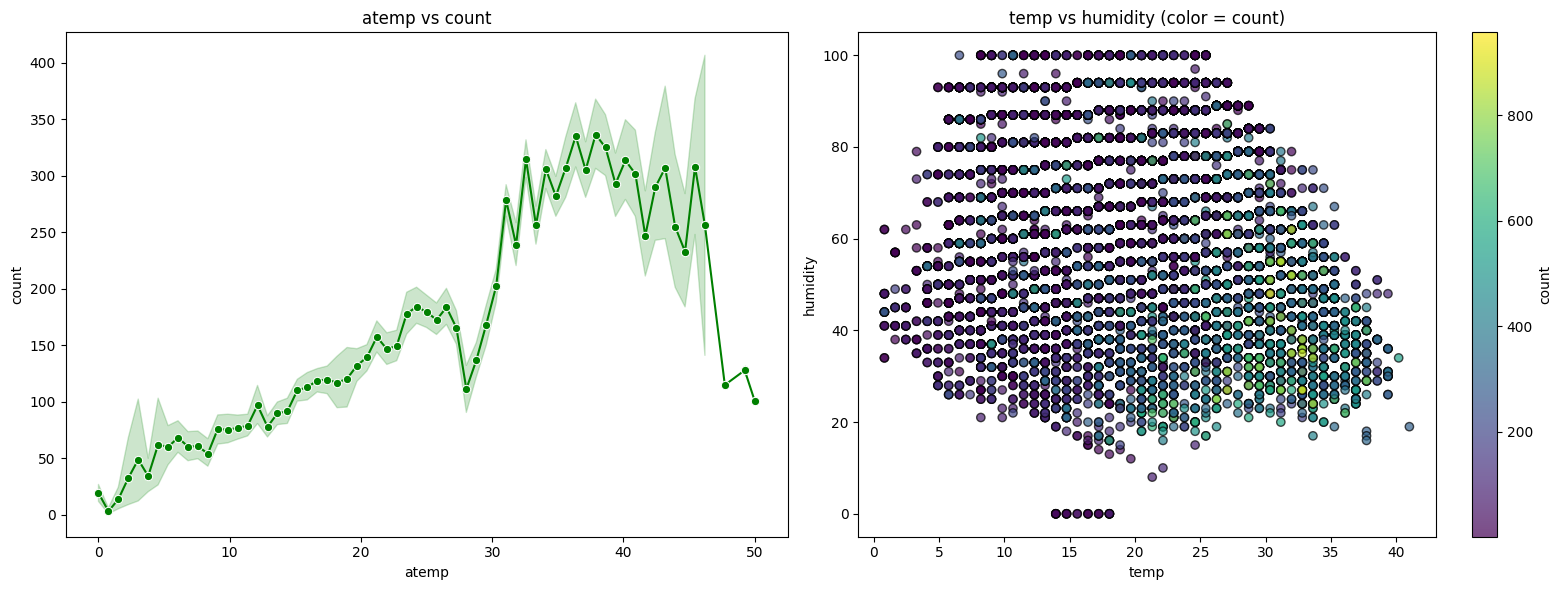

In [32]:
plt.figure(figsize=(16, 6))

# --- Left Plot: atemp vs count
plt.subplot(1, 2, 1)
sns.lineplot(x='atemp', y='count', data=df_eda_full, marker='o', color='green')
plt.title('atemp vs count')
plt.xlabel('atemp')
plt.ylabel('count')

# --- Right Plot: temp and humidity interaction with count (color coded)
plt.subplot(1, 2, 2)
scatter = plt.scatter(
    df_eda_full['temp'], df_eda_full['humidity'], c=df_eda_full['count'],
    cmap='viridis', alpha=0.7, edgecolor='k'
)
plt.colorbar(scatter, label='count')
plt.title('temp vs humidity (color = count)')
plt.xlabel('temp')
plt.ylabel('humidity')

plt.tight_layout()
plt.show()

### Having done these, we can see it is possible to engineer more features that can help us extract more signal/insights from already strong features and based on:

1.   Segmentation of rush hour

1.   Categorize part of the day

3.   An interaction feature among temperature, feels-like-temperature and humidity

4. Temperature tolerance feeling

5. Working hour




In [33]:
# Categorize part of the day
def part_of_day(hour):
    if hour <= 6:              # 0–6     ➝ Early Morning
        return 'Early Morning'
    elif hour <= 11:           # 7–11    ➝ Morning
        return 'Morning'
    elif hour <= 15:           # 12–15   ➝ Afternoon
        return 'Afternoon'
    elif hour <= 19:           # 16–19   ➝ Evening
        return 'Evening'
    else:                      # 20–23   ➝ Night
        return 'Night'
df_eda_full['part_of_day'] = df_eda_full['hour'].apply(part_of_day)

In [34]:
# Segmentation of rush hour
df_eda_full['rush_hour'] = df_eda_full['hour'].isin([8, 16, 17, 18, 19]).astype(int)

In [35]:
# Temperature tolerance feeling
def label_temp(t):
    if t < 10:
        return 'brr_cold'
    elif t < 20:
        return 'cold'
    elif t < 29:
        return 'cool'
    elif t < 39:
        return 'warm'
    elif t <= 49:
        return 'hot'
    else:
        return 'boiling_hot'

df_eda_full['temp_tolerance_feel'] = df_eda_full['atemp'].apply(label_temp)

In [36]:
# An interaction feature among temperature, feels-like-temperature and humidity df -->> insights drawn from the temp, atemp, humidity related plot above
df_eda_full['temp_hum_factor'] = (df_eda_full['temp'] * (100 - df_eda_full['humidity'])) / df_eda_full['atemp']
# for values with atemp=0, we need to tackle infinity values
df_eda_full['temp_hum_factor'] = df_eda_full['temp_hum_factor'].replace([np.inf, -np.inf], np.nan)
df_eda_full['temp_hum_factor'] = df_eda_full['temp_hum_factor'].fillna(df_eda_full['temp_hum_factor'].median())

In [37]:
# Working hour feature
df_eda_full['hour_workingday'] = df_eda_full['hour'] * df_eda_full['workingday']

In [38]:
# mark bad_weather
df_eda_full['bad_weather'] = df_eda_full['weather'].isin(["Light Snow/Rain", "Heavy Precipitation"]).astype(int)

In [39]:
# sanity-check
df_eda_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14491 entries, 0 to 14490
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             14491 non-null  datetime64[ns]
 1   season               14491 non-null  object        
 2   holiday              14491 non-null  int64         
 3   workingday           14491 non-null  int64         
 4   weather              14491 non-null  object        
 5   temp                 14491 non-null  float64       
 6   atemp                14491 non-null  float64       
 7   humidity             14491 non-null  int64         
 8   windspeed            14491 non-null  float64       
 9   count                14491 non-null  int64         
 10  hour                 14491 non-null  int32         
 11  day_name             14491 non-null  object        
 12  month                14491 non-null  object        
 13  year                 14491 non-null 

### Having done these, let us see how the numerical features correlate with the target variable and with each other.

<Axes: >

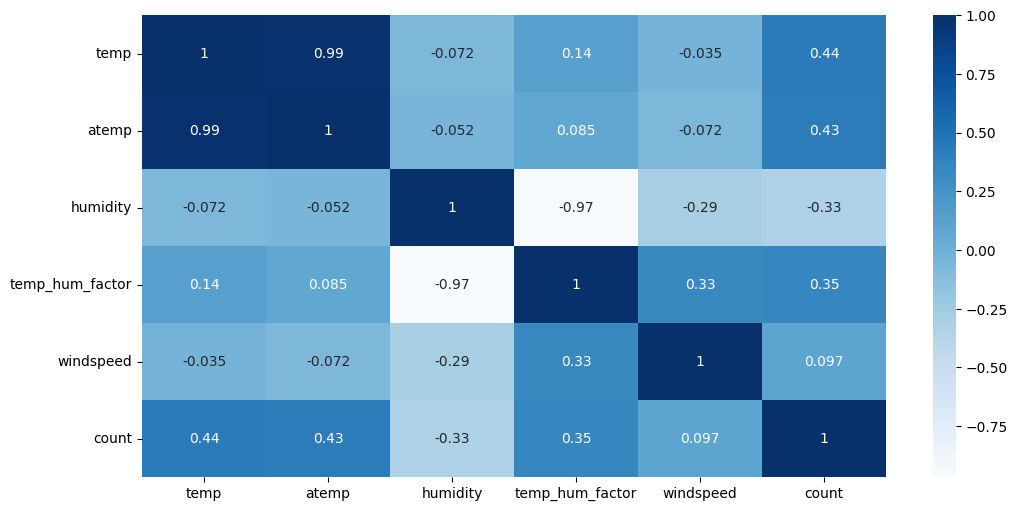

In [40]:
# let us generate a heatmap
plt.figure(figsize=(12, 6))
corr_col = ['temp', 'atemp', 'humidity', 'temp_hum_factor', 'windspeed', 'count']
sns.heatmap(df_eda_full[corr_col].corr(), annot=True, cmap='Blues')

#### We observe the fearture `temp` and `atemp` have high correlation between them and one of them needs to be dropped to avoid Multicollinearity. So we shall drop atemp as temp has a slight higher correlation with the target feature.

In [41]:
del df_eda_full['atemp']

### Now let us move our attention to the windspeed feature

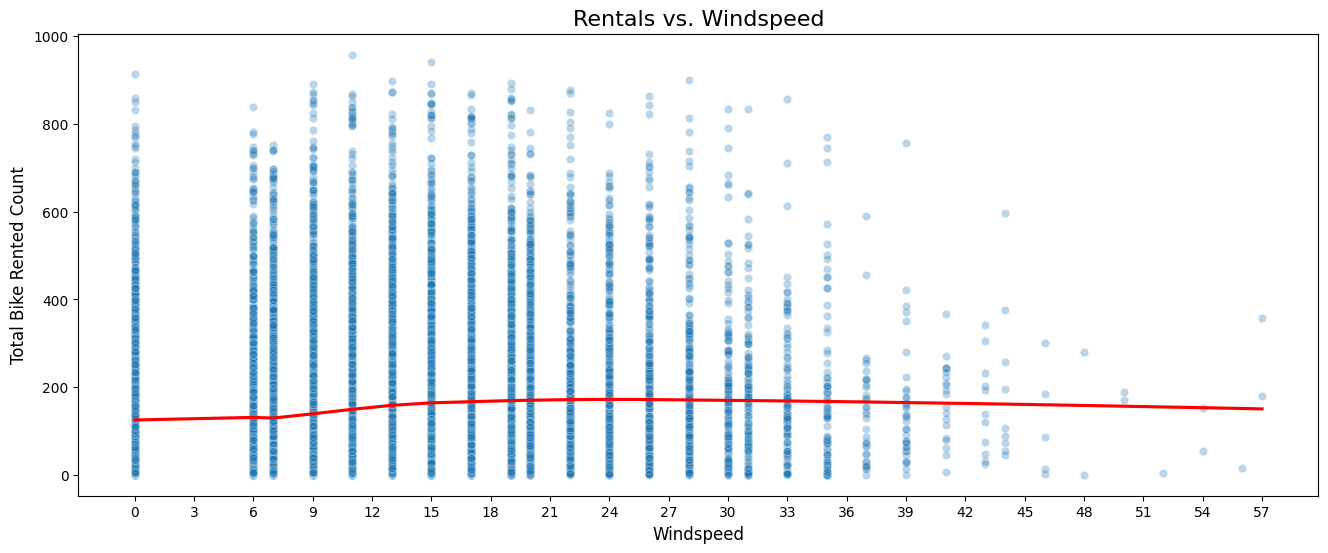

In [42]:
# let us visualize the windspeed feature w.r.t the target feature
plt.figure(figsize=(16,6))
sns.scatterplot(
    data=df_eda_full,
    x='windspeed',
    y='count',
    alpha=0.3
)
# adding a lowess‐smoothed line
sns.regplot(
    data=df_eda_full,
    x='windspeed',
    y='count',
    scatter=False,
    lowess=True,
    color='red'
)
plt.title('Rentals vs. Windspeed', fontsize=16)
plt.xlabel('Windspeed', fontsize=12)
plt.ylabel('Total Bike Rented Count', fontsize=12)
plt.xticks(np.arange(0, round(df_eda_full.windspeed.max(), 0) + 3, 3))

plt.show()

In [43]:
round(df_eda_full[df_eda_full["windspeed"] == 0].shape[0]/df_eda_full.shape[0]*100, 2)

12.15

#### We observe that a considerable percentage of zero values (`12.15%`) for windspeed and that calls in for concern regarding sensor error or broken upstream pipeline. For our purpose, we fix it by imputing meaningfull values replacing these zeros values.

#### We understand that the windspeed can depend on following features available in the feature matrix:

    "season","weather","humidity","temp","hour", "month", "year"

#### So let us train a model on these features targeting to predict the corresponding windspeed.

In [44]:
# Columns to use — categorical (string) + numerical
wind_features = ["season", "weather", "humidity", "temp", "hour", "month", "year"]

# Split the data
dataWindZero = df_eda_full[df_eda_full["windspeed"] == 0].copy()
dataWindNotZero = df_eda_full[df_eda_full["windspeed"] != 0].copy()

# Convert feature rows to dict format for DictVectorizer
dv = DictVectorizer(sparse=False)


# Fit on non-zero wind data
X_train_dict = dataWindNotZero[wind_features].to_dict(orient='records')
X_train_vec = dv.fit_transform(X_train_dict)

# Fit the model --> selected: RandomForestRegressor
windspeed_imputer = RandomForestRegressor(random_state=42)
windspeed_imputer.fit(X_train_vec, dataWindNotZero["windspeed"])

# Transform the zero-wind data
X_pred_dict = dataWindZero[wind_features].to_dict(orient='records')
X_pred_vec = dv.transform(X_pred_dict)

# Predict and fill missing values
dataWindZero["windspeed"] = windspeed_imputer.predict(X_pred_vec)

In [45]:
# Predictions
wind_preds = windspeed_imputer.predict(dv.transform(dataWindNotZero[wind_features].to_dict(orient='records')))


# RMSE
rmse = np.sqrt(mean_squared_error(dataWindNotZero["windspeed"], wind_preds))
print("RMSE:", rmse)

# R² Score
r2 = r2_score(dataWindNotZero["windspeed"], wind_preds)
print("R² Score:", r2)

RMSE: 2.453992776839077
R² Score: 0.881407200751165


In [46]:
# Merge back and reset the indices to sort in chronologival order
df_eda_full = pd.concat([dataWindNotZero, dataWindZero], axis=0)
df_eda_full = df_eda_full.sort_values(by="datetime").reset_index(drop=True)

In [47]:
# sanity-check
round(df_eda_full[df_eda_full["windspeed"] == 0].shape[0]/df_eda_full.shape[0]*100, 2)

0.0

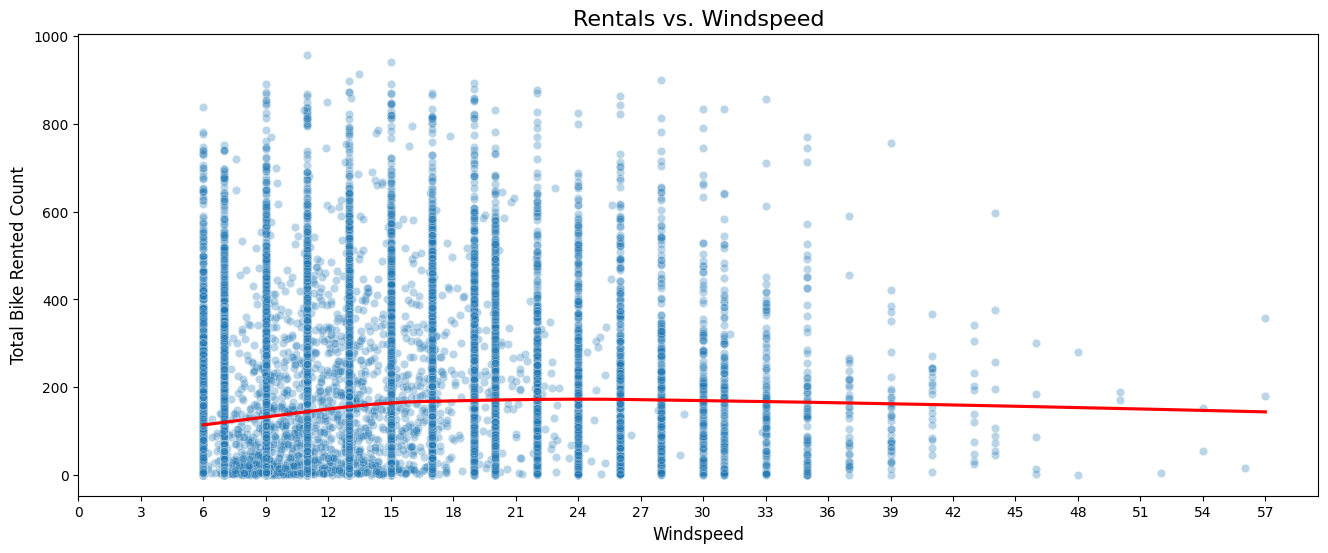

In [48]:
# sanity-check with the earlier plot after imputation

# let us visualize the windspeed feature w.r.t the target feature
plt.figure(figsize=(16,6))
sns.scatterplot(
    data=df_eda_full,
    x='windspeed',
    y='count',
    alpha=0.3
)
# adding a lowess‐smoothed line
sns.regplot(
    data=df_eda_full,
    x='windspeed',
    y='count',
    scatter=False,
    lowess=True,
    color='red'
)
plt.title('Rentals vs. Windspeed', fontsize=16)
plt.xlabel('Windspeed', fontsize=12)
plt.ylabel('Total Bike Rented Count', fontsize=12)
plt.xticks(np.arange(0, round(df_eda_full.windspeed.max(), 0) + 3, 3))

plt.show()

In [49]:
# check count and structure
df_eda_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             14491 non-null  datetime64[ns]
 1   season               14491 non-null  object        
 2   holiday              14491 non-null  int64         
 3   workingday           14491 non-null  int64         
 4   weather              14491 non-null  object        
 5   temp                 14491 non-null  float64       
 6   humidity             14491 non-null  int64         
 7   windspeed            14491 non-null  float64       
 8   count                14491 non-null  int64         
 9   hour                 14491 non-null  int32         
 10  day_name             14491 non-null  object        
 11  month                14491 non-null  object        
 12  year                 14491 non-null  int32         
 13  part_of_day          14491 non-

In [50]:
# sanity-check for chronological order
df_eda_full.iloc[3269:3321]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,day_name,month,year,part_of_day,rush_hour,temp_tolerance_feel,temp_hum_factor,hour_workingday,bad_weather
3269,2011-05-21 03:00:00,Spring,0,0,Clear/Partly Cloudy,19.68,82,7.001500,19,3,Saturday,May,2011,Early Morning,0,cool,15.083670,0,0
3270,2011-05-21 04:00:00,Spring,0,0,Clear/Partly Cloudy,18.86,88,8.998100,7,4,Saturday,May,2011,Early Morning,0,cool,9.959076,0,0
3271,2011-05-21 05:00:00,Spring,0,0,Clear/Partly Cloudy,18.86,88,7.001500,5,5,Saturday,May,2011,Early Morning,0,cool,9.959076,0,0
3272,2011-05-21 06:00:00,Spring,0,0,Clear/Partly Cloudy,20.50,82,8.998100,28,6,Saturday,May,2011,Early Morning,0,cool,15.222772,0,0
3273,2011-05-21 07:00:00,Spring,0,0,Clear/Partly Cloudy,22.14,73,8.998100,43,7,Saturday,May,2011,Morning,0,cool,23.205745,0,0
3274,2011-05-21 08:00:00,Spring,0,0,Clear/Partly Cloudy,22.96,68,19.001200,126,8,Saturday,May,2011,Morning,1,cool,27.709598,0,0
3275,2011-05-21 09:00:00,Spring,0,0,Clear/Partly Cloudy,24.60,64,15.001300,225,9,Saturday,May,2011,Morning,0,warm,29.222901,0,0
3276,2011-05-21 10:00:00,Spring,0,0,Clear/Partly Cloudy,25.42,61,7.001500,323,10,Saturday,May,2011,Morning,0,warm,32.713414,0,0
3277,2011-05-21 11:00:00,Spring,0,0,Clear/Partly Cloudy,26.24,53,8.998100,418,11,Saturday,May,2011,Morning,0,warm,39.706375,0,0
3278,2011-05-21 12:00:00,Spring,0,0,Clear/Partly Cloudy,27.06,50,13.470167,493,12,Saturday,May,2011,Afternoon,0,warm,43.560850,0,0


#### Finally save the dataframe to a Pickle file

In [51]:
pd.to_pickle(df_eda_full, './data/feature_engineered_data.pkl')